# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías

import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
!pip install pandas matplotlib


In [2]:
# leer conjuntos de datos en los DataFrames. Separador ;

aisles = pd.read_csv('/aisles.csv', sep=';')
depart = pd.read_csv('/departments.csv', sep=';')
instacart = pd.read_csv('/instacart_orders.csv', sep=';')
order_products = pd.read_csv('/order_products.csv', sep=';')
products = pd.read_csv('/products.csv', sep=';')

# Verificamos las primeras 5 filas de las bases de datos

print('aisles\n', aisles.head())
print()
print('departments\n', depart.head())
print()
print('instacart_orders\n', instacart.head())
print()
print('order_products\n', order_products.head())
print()
print('products\n', products.head())

aisles
    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

departments
    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

instacart_orders
    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4 

In [3]:
#Verificamos info de cada base de datos para ver valores faltantes

print('aisles\n', aisles.info())
print()
print('departments\n', depart.info())
print()
print('instacart_orders\n', instacart.info())
print()
print('order_products\n', order_products.info(show_counts=True))
print()
print('products\n', products.info())
print()
#Verificamos por qué las variables mencionadas abajo aparecen como decimales siendo enteros
print(order_products['add_to_cart_order'].sum())
print()
print(order_products['add_to_cart_order'])
print()
print(instacart['days_since_prior_order'].sum())
print()
print(instacart['days_since_prior_order'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
aisles
 None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
departments
 None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   o

In [4]:
#Verificamos con shape cuántas filas y columnas tiene cada DataFrame

print(instacart.shape)
print()
print(products.shape)
print()
print(aisles.shape)
print()
print(depart.shape)
print()
print(order_products.shape)
print()

#La base mas grande la tiene order_products con 4545007 filas. Mientras que departments solo tiene 21 filas

(478967, 6)

(49694, 4)

(134, 2)

(21, 2)

(4545007, 4)



In [5]:
#Verificamos valores faltantes con isnull().sum()
print('aisles\n', aisles.isna().sum())
print()
print('departments\n', depart.isna().sum())
print()
print('instacart_orders\n', instacart.isna().sum())
print()
print('order_products\n', order_products.isna().sum())
print()
print('products\n', products.isna().sum())

aisles
 aisle_id    0
aisle       0
dtype: int64

departments
 department_id    0
department       0
dtype: int64

instacart_orders
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

order_products
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

products
 product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [6]:
#Verificamos estadistica descriptiva
print('aisles\n', aisles.describe())
print()
print('departments\n', depart.describe())
print()
print('instacart_orders\n', instacart.describe())
print()
print('order_products\n', order_products.describe())
print()
print('products\n', products.describe())

aisles
          aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000

departments
        department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000

instacart_orders
            order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

#### Valores faltantes

La variable days_since_prior_order de la base instacart_orders tiene **28819** valores ausentes

La variable product_name de la base products tiene **1258** valores ausentes

La variable add_to_cart_order de la base order_products tiene **836** valores ausentes

 #### Adicionales

 Variables como days_since_prior_order y add_to_cart_order son tipo decimal (float), donde deberían ser enteros (int). Tiene .0 al final, por eso los leen como decimal

 Variables como order_id, user_id, order_dow, product_id, aisle_id, department_id, reordered, a pesar de ser de tipo entero (int), son variables categóricas. reordered es booleano.





# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. Con .info() pudimos observar superficialmente el tipo de cada variable y si hay valores ausentes o no. En el caso de las variables id, los tipos de datos son números enteros (int).

2. Procedemos a identificar valores ausentes. Sabemos que hay 3 variables con valores ausentes. Para esto usamos .isna() para detectar estas filas y encontrar una justificación detrás. Posteriormente, decidimos si eliminamos las filas con valores ausentes usando .dropna(), o si reemplazamos los valores ausentes con otro valor utilizando .fillna().

3. Con .duplicated() podemos encontrar valores duplicados explícitos. Estos valores se pueden procesar con .drop_duplicates(), y luego podemos resetear el índice con .reset_index().

4. Para encontrar valores implícitos, realizamos un ejercicio filtrando de la base instacart_orders las órdenes de los días miércoles a las 2 p.m. Con .nunique() podemos contar los valores únicos y compararlos con el total de filas, identificando si hay user_id repetidos. Con .value_counts() podemos contar la frecuencia de los user_id repetidos y, filtrándolos, podemos analizar la razón detrás, determinando si son duplicados explícitos o no.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

In [7]:
# Revisamos duplicados explícitos

print('aisles\n', aisles.duplicated().sum())
print()
print('departments\n', depart.duplicated().sum())
print()
print('instacart_orders\n', instacart.duplicated().sum()) #Tiene 15 duplicados
print()
print('order_products\n', order_products.duplicated().sum())
print()
print('products\n', products.duplicated().sum())



aisles
 0

departments
 0

instacart_orders
 15

order_products
 0

products
 0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [8]:
# Basándote en los hallazgos, instacart_orders tiene 15 duplicados explícitos. Los demas DataFrames no tiene duplicados explícitos
#Se identifican los order_id que estan duplicados
print('Duplicados antes de procesar la base\n', instacart.duplicated().sum())
print()
print(instacart[instacart.duplicated()])
print()
#Eliminamos duplicados explícitos
instacart = instacart.drop_duplicates().reset_index(drop=True)
print('Duplicados despues de procesar la base\n', instacart.duplicated().sum())
print()


Duplicados antes de procesar la base
 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   

In [9]:
# Verificamos todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
#Usando filtrado con operadores logicos verificamos las ordenes de los dias miercoles 2am
instacart_wednesday_2am=(instacart[(instacart['order_dow'] == 3) & (instacart['order_hour_of_day'] == 2)])
print(instacart_wednesday_2am)
print()
#Si cuento los valores de user_id, me dan 106 valores unicos.
print(instacart_wednesday_2am['user_id'].nunique())
print()
#Creo la variable order_counts para contar las veces que se repite cada user_id. Evidenciamos que cada user_id solo se repite una vez. Son usuarios unicos
order_counts = instacart_wednesday_2am['user_id'].value_counts()
print(order_counts)
print()


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
456998   3384021    14881             6          3                  2   
458801    910166   164782            18          3                  2   
459620   1680532   106435             6          3                  2   
468309    222962    54979            59          3                  2   
477511   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

###¿Qué sugiere este resultado?

Al filtrar la base por miercoles 2 am no encontramos ninguna novedad con el DataFrame. Aparecen 106 usuarios unicos que han realizado compras en esa fraja de dia y tiempo y ningun usuario se repite en esa misma franja

In [10]:
# Vuelve a verificar si hay filas duplicadas
print(instacart[instacart.duplicated()])
#No hay duplicados explícitos

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [11]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart['order_id'].nunique())
print(instacart['order_id'].info())
print()
#No hay order_id duplicados explícitos

478952
<class 'pandas.core.series.Series'>
RangeIndex: 478952 entries, 0 to 478951
Series name: order_id
Non-Null Count   Dtype
--------------   -----
478952 non-null  int64
dtypes: int64(1)
memory usage: 3.7 MB
None



##Describe brevemente tus hallazgos y lo que hiciste con ellos

1. Identificamos valores duplicados explícitos en instacart y los eliminamos.
2. Buscamos valores duplicados implicitos por user_id tomando como base el dia miercoles a las 2 pm y no encontramos valores duplicados.

### `products` data frame

In [12]:
# Verifica si hay filas totalmente duplicadas
print(products[products.duplicated()].sum())
#No hay duplicados explícitos

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: object


In [13]:
# Revisa únicamente si hay ID de departamentos duplicados
#Al usar .info(), evidenciamos que la base tiene 4774 filas
print('products\n', products.info())
print()
#Pero si cuento los valores de user_id, me dan 20 valores unicos. Es decir, hay departamentos que se repiten
print(products['department_id'].nunique())
print()
#Creo la variable department_counts para contar las veces que se repite cada user_id
department_counts = products['department_id'].value_counts()
print(department_counts)
print()
#Filtro el department_id mas repetido para observar las variables y sacar conclusiones
print(products[(products['department_id'] == 11) ])
print()
#Se evidencia que product_name hacer referencia a productos del cuidado personal y salud; es decir, que el departamento 11 se refiere a ese tipo de productos
#Viendo lo anterior, es normal asumir que los valores de department_id se repiten, puesto que es una categorización de los productos organizados en un espacio para este caso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
products
 None

21

department_id
11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

       product_id                                       product_name  \
5               6                                       Dry Nose Oil   
12             13                                  Saline Nasal Mist   
21             22                  Fresh Breath Oral Rinse Mild Mint   
23  

In [14]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras minusculas para compararlos mejor)
#Primero se pasa la columna product_name a minuscula
products['product_name'] = products['product_name'].str.lower()
print(products['product_name'])
print()

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object



In [15]:
# Revisa si hay nombres duplicados de productos no faltantes
#Verificamos si hay duplicados en products_name y filtramos lo que tienen frecuencia mayor a 1
product_name_count = products['product_name'].value_counts()
product_repetidos = product_name_count[product_name_count > 1]
print(product_repetidos)
print()
#Filtramos por el producto de mayor frecuencia (green tea with ginseng and honey)
print(products[(products['product_name'] == 'green tea with ginseng and honey')])
print()
#Al filtrar green tea with ginseng and honey se evidencia que efecticvamente está repetido, mismo producto con 3 product_id, con diferentes aisle_id y department_id
#Verificamos cuantos valores unicos de product_name hay. Para este caso son 48332 valores unicos, pero la base en total tiene 48436 filas.
print(products['product_name'].nunique())
print()
print(products.info())
print()
#Pasamos a eliminar los product_name duplicados con drop.duplicates()
products_limpio = products.drop_duplicates(subset=['product_name'])
print()
products = products_limpio
# Verificamos los resultados
print(products['product_name'].value_counts())


product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
cauliflower head                                                        2
half and half                                                           2
original bbq sauce                                                      2
spreadable butter with canola oil                                       2
mandarin oranges in light syrup                                         2
Name: count, Length: 103, dtype: int64

       product_id                      product_name  aisle_id  department_id
2037         2038  green tea with ginseng and honey     

##Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al organizar product_name en minuscula y contar frecuencias, nos damos cuenta que hay productos repetidos con diferentes product_id, aisle_id y/o department_id
Al identificarlos, los eliminamos con drop.duplicate() para limpiar la base

### `departments` data frame

In [16]:
# Revisa si hay filas totalmente duplicadas
print(depart[depart.duplicated()].sum())
#No hay duplicados explícitos

department_id    0
department       0
dtype: object


In [17]:
# Revisa únicamente si hay IDs duplicadas de productos
#Al usar .info(), evidenciamos que la base tiene 21 filas
print('departments\n', depart.info())
print()
#Y si cuento los valores de deparment_id, me dan 21 valores unicos. Es decir, no hay departamentos que se repiten
print(depart['department_id'].nunique())
print()
#Al ser un DataFrame solo de 21 filas, puedo verlo todo
print(depart)
# Se evidencia que no hay nada malo con el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
departments
 None

21

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18 

###Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame está bien, sin valores duplicados


### `aisles` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()].sum())
#No hay duplicados explícitos

aisle_id    0
aisle       0
dtype: object


In [19]:
# Revisa únicamente si hay IDs duplicadas de pasillos
#Al usar .info(), evidenciamos que la base tiene 134 filas
print(aisles.info())
print()
#Y si cuento los valores de aisle_id, me dan 134 valores unicos. Es decir, no hay id que se repiten
print(aisles['aisle_id'].nunique())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

134



###Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame está bien, sin valores duplicados


### `order_products` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()].sum())
#No hay duplicados explícitos


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


In [21]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#1ro imprimo la tabla para entenderla bien
print(order_products)
print()
#2do cuento frecuencias en la variable order_id
print (order_products['order_id'].value_counts())
#Por fines practicos, creo la variable order_id_count que cuenta las frencuencas de order_id
order_id_count = order_products['order_id'].value_counts()
#Imprimo frecuencias iguales a 2 para que visualmente sea mas facil de entender
print(order_id_count[(order_id_count == 2) ])
#Filtro el order_id = 2643010
print(order_products[order_products['order_id']==2643010])
#Filtro el order_id = 2624419 que se repite 4 veces
print(order_products[order_products['order_id']==2624419])
#No hay novedad con la base. El order_id se repite porque cada orden puede tener mas de 1 producto. Lo podemos evidenciar con add_to_cart_order

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64
order_id
2977524    2
731752     2


###Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al hacer varias interacciones con la base, no encuentro valores duplicados


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
#Se verifican valores ausentes. Para este caso solo queda uno
print('Valores ausentes product_name antes  de reemplazarlos \n',products['product_name'].isna().sum())
print(products[products['product_name'].isna()])
print()
#Eliminamos el valor ausente con dropna
products = products.dropna(subset=['product_name'])
print()
print('Valores ausentes product_name despues  de reemplazarlos \n',products['product_name'].isna().sum())
print()


Valores ausentes product_name antes  de reemplazarlos 
 1
    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


Valores ausentes product_name despues  de reemplazarlos 
 0



##Describe brevemente cuáles son tus hallazgos.
Se verifica que los valores ausentes en product_name tuvieran un unico product_id. Se usan 4 valores prueba (38, 72, 49553, 49575).
Se identifica que cada NaN tiene asignado un unico product_id y este no se repite.
Esta validación se hizo para tratar de encontrar el product_name ausente a través del product_id

In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
#¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

#Si, estaban relacionados a aisle_id=100 y a department_id=21
print(aisles[aisles['aisle_id']==100])
print()
print(depart[depart['department_id']==21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


##Describe brevemente cuáles son tus hallazgos.
Al revisar bien los ausentes en la base product notamos que estaban asignados al aisle_id 100 y al department_id 21. Ambos estan categorizados como missing.

In [24]:
# Completa los nombres de productos ausentes con 'Unknown'
print('Valores ausentes product_name antes de reemplazarlos \n',products['product_name'].isna().sum())
print()
products['product_name'] = products['product_name'].fillna('Unknown')
print('Valores ausentes product_name despues  de reemplazarlos \n',products['product_name'].isna().sum())
print()
print(products[products['product_name']=='Unknown'])

Valores ausentes product_name antes de reemplazarlos 
 0

Valores ausentes product_name despues  de reemplazarlos 
 0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


<ipython-input-24-e2729f2a0795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_name'] = products['product_name'].fillna('Unknown')


### `instacart_orders` data frame

In [25]:
#Hay que identificar y corregir los valores ausentes. Estos ya los identificamos en el Paso 1

#Para el caso de instacart['days_since_prior_order'], para  los NaN se evidencia que la variable order_number es 1; es decir, es el primer pedido del cliente
print('Valores ausentes days_since_prior_order antes  de reemplazarlos \n',instacart['days_since_prior_order'].isna().sum())
print()
print(instacart[instacart['days_since_prior_order'].isna()])
print()
print(instacart[instacart['order_number']==1])


Valores ausentes days_since_prior_order antes  de reemplazarlos 
 28817

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28               

In [26]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

#No lo hay

print(instacart[(instacart['days_since_prior_order'] == 'NaN') & (instacart['order_number'] != 1)]) #Filtramos valores ausentes en la columna days_since_prior_order y valores diferenres a 1 en order_number para saber si hay ausentes diferentes al primer pedido
print()

#Ahora reemplazamos los valores ausentes por 0
#instacart['days_since_prior_order']=instacart['days_since_prior_order'].fillna(0)
#print('Valores ausentes days_since_prior_order despues de reemplazarlos \n',instacart['days_since_prior_order'].isna().sum())



Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []



###Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para el caso de instacart['days_since_prior_order'], para  los NaN se evidencia que la variable order_number es 1; es decir, es el primer pedido del cliente.
Hicimos el ejercicio de filtrar si hay NaN que no fueran el primer pedido y no se encontraron valores.


### `order_products` data frame

In [27]:
# Encuentra los valores ausentes

#La variable add_to_cart_order de la base order_products tiene 836 valores ausentes
print('Valores ausentes add_to_cart_order antes  de reemlazarlos \n',order_products['add_to_cart_order'].isna().sum())
print(order_products[order_products['add_to_cart_order']==0])
print()
print(order_products[order_products['add_to_cart_order'].isna()])
print()


Valores ausentes add_to_cart_order antes  de reemlazarlos 
 836
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]



In [28]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

#Despues de eliminar los valores ausentes, podemos observar que el valor minimo de add_to_cart_order es 1 y el valor maximo es 64

print(order_products.describe())

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00


In [29]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ausentes = order_products[order_products['add_to_cart_order'].isna()] #Se guarda en la variable ausentes
ids_ausentes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].tolist() #Se guarda en una lista en ids_ausentes
print()
print(ausentes)
print()
print(ids_ausentes)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844

In [30]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(order_products[order_products['add_to_cart_order'].isna()])
print()
conteo_productos = ausentes.groupby('order_id')['product_id'].count()
print(conteo_productos.describe())
#Con esto evidencio que ningun valor ausente tiene mas de 64 productos, el maximo es 63 productos.




         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

count    70.000000
mean     11.942857
std      12.898585
min       1.000000
25%       3.000000
50%       7.000000
75%      14.000000
max      63.000000
Name: product_id, dtype: float64


Describe brevemente cuáles son tus hallazgos.

In [31]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
print('Valores ausentes add_to_cart_order antes de reemplazarlos \n',order_products['add_to_cart_order'].isna().sum())
order_products['add_to_cart_order'] =order_products['add_to_cart_order'].fillna('999')
print('Valores ausentes add_to_cart_order despues de reemplazarlos \n',order_products['add_to_cart_order'].isna().sum())
print()
print(order_products.info())
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int) #Pasamos la columna a entero
print()
print(order_products.info())

Valores ausentes add_to_cart_order antes de reemplazarlos 
 836
Valores ausentes add_to_cart_order despues de reemplazarlos 
 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  object
 3   reordered          int64 
dtypes: int64(3), object(1)
memory usage: 138.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


# Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

##Preprocesamiento de los datos

##Valores duplicados:

Se identificaron duplicados explícitos y duplicados implícitos.
Duplicados explícitos: Filas idénticas en la base instacart_orders que fueron eliminadas utilizando drop_duplicates().
Duplicados implícitos: Productos con nombres iguales pero asociados a diferentes categorías o IDs, posiblemente causados por inconsistencias en la gestión de la base de datos. Estos duplicados se analizaron cuidadosamente y, en algunos casos, se consolidaron o eliminaron con drop.duplicates() dependiendo del contexto.
Razón de los duplicados: Pueden haber surgido debido a actualizaciones incompletas en los registros o errores humanos al ingresar datos.

##Valores ausentes:

Se encontraron valores ausentes en columnas clave como add_to_cart_order, days_since_prior_order y product_name.

Para el caso de la base products, los valores ausentes corresponden a missing. Esto lo determinamos porque están asignados a aisle_id = 100 y a department_id =21, ambos categorizados como missing. Sin embargo, casi todos los valores ausentes también estaban duplicados. Al limpiar la base de los duplicados se eliminaron casi todos los ausentes.
Al final este valor ausente que quedó se reemplazo por Unknown.

Para el caso del DataFrame instacart_orders, para  los NaN en days_since_prior_order, se evidencia que la variable order_number es 1; es decir, es el primer pedido del cliente y no hay mas ausentes que no sea por el primer pedido del cliente.

Por ultimo, en la base order_products, la variable add_to_cart_order, sus valores ausentes se reemplazaron por 999 y se pasaron a numero entero

###Impacto del preprocesamiento:

Eliminar y completar los valores ausentes y duplicados asegura que el conjunto de datos sea más limpio y confiable para análisis posteriores.
Estas acciones redujeron el sesgo potencial que podrían haber causado los valores ausentes y duplicados, mejorando la calidad del modelo de datos.
Lecciones aprendidas:

El preprocesamiento es fundamental para garantizar que los datos sean consistentes, completos y relevantes.
Este proceso ayudó a identificar áreas críticas donde los datos iniciales tenían problemas significativos que podrían haber

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [32]:
#Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).
#Se hace la verificación correspondiente y las dos variales si son razonables, son numero enteros y estan entre los rangos requeridos
print(instacart.describe())
print()
print(instacart.info())
print()
print('Valores de order_hour_of_day \n',sorted(instacart['order_hour_of_day'].unique()))
print()
print('Valores de order_dow \n',sorted(instacart['order_dow'].unique()))

           order_id        user_id   order_number      order_dow  \
count  4.789520e+05  478952.000000  478952.000000  478952.000000   
mean   1.709953e+06  102966.654911      17.157563       2.775051   
std    9.869537e+05   59525.292863      17.704457       2.045901   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564698e+05   51413.750000       5.000000       1.000000   
50%    1.709521e+06  102633.000000      11.000000       3.000000   
75%    2.563002e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478952.000000           450135.000000  
mean           13.447034               11.101814  
std             4.224567                9.190004  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000                7.000000  
75%            16.000000      

Escribe aquí tus conclusiones

Se hace la verificación correspondiente y las dos variales si son razonables, son numero enteros y estan entre los rangos requeridos


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

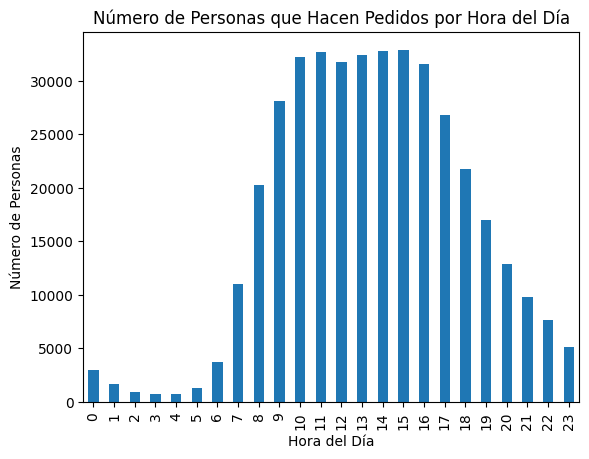

In [33]:
#2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
hourly_orders = instacart.groupby('order_hour_of_day')['user_id'].nunique() #Agrupamos por order_hour_of_day y contamos cuantos usuarios hay por cada hora del dia
hourly_orders.plot(x='order_hour_of_day', y='user_id',
                   kind='bar',
                   title='Número de Personas que Hacen Pedidos por Hora del Día',
                   xlabel='Hora del Día',
                   ylabel='Número de Personas')
plt.show()

Escribe aquí tus conclusiones

La distribución me indica que las personas van mas frecuentemente en la franja entre 10 am y 4 pm


### [A3] ¿Qué día de la semana compran víveres las personas?

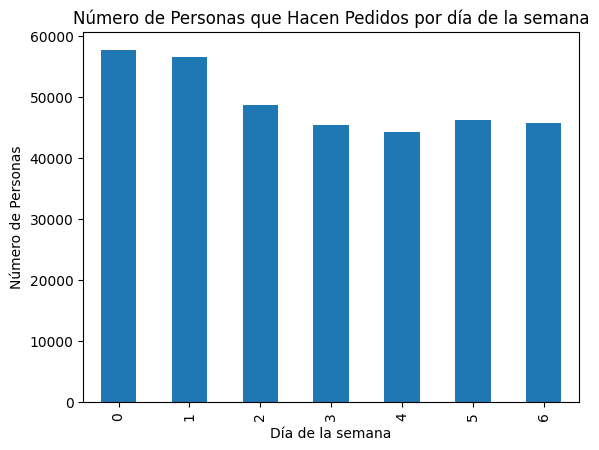

In [34]:
#3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
weekly_orders = instacart.groupby('order_dow')['user_id'].nunique() #Agrupamos por order_dow y contamos cuantos usuarios hay por cada dia de la semana
weekly_orders.plot(x='order_dow', y='user_id',
                   kind='bar',
                   title='Número de Personas que Hacen Pedidos por día de la semana',
                   xlabel='Día de la semana',
                   ylabel='Número de Personas')
plt.show()

Escribe aquí tus conclusiones

Domingos y lunes son los dias que mas personas hacen compras. Caso contrario, miercoles y jueves son los dias que menos personas hacen compras

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

count    478952.000000
mean         10.433853
std           9.292153
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


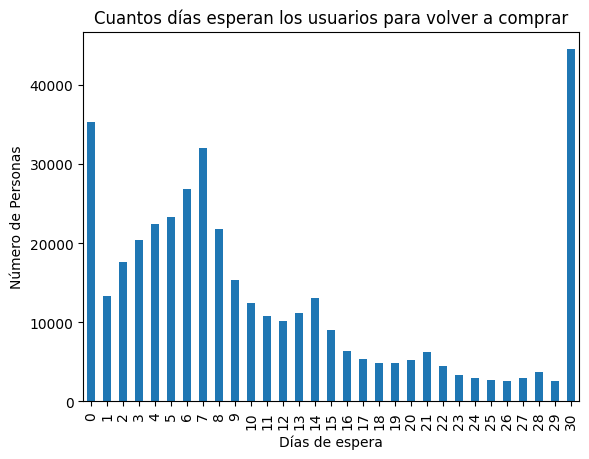

In [35]:
#4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.
instacart['days_since_prior_order'] = instacart['days_since_prior_order'].fillna(0).astype(int) #Se pasa la variable days_since_prior_order a entero para que visualmente quede mejor
waiting_orders = instacart.groupby('days_since_prior_order')['user_id'].nunique() #Agrupamos por days_since_prior_order y contamos cuantos usuarios hay por cada dia pasado
print(instacart['days_since_prior_order'].describe())
waiting_orders.plot(x='days_since_prior_order', y='user_id',
                   kind='bar',
                   title='Cuantos días esperan los usuarios para volver a comprar',
                   xlabel='Días de espera',
                   ylabel='Número de Personas')
plt.show()

Escribe aquí tus conclusiones

Los días de espera están entre 0 y 30, representando a quienes no esperan ni un día y a quienes compran una vez al mes.
Estos dos valores son los de mayor frecuencia, siendo 30 días el indiscutible ganador. Es decir, en la distribución, los usuarios realizan compras una vez al mes. Por otro lado, quienes esperan 0 días posiblemente sean usuarios que olvidaron agregar algo al carrito tras haber pagado, y luego regresaron para comprar lo que les faltaba.
Adicional para tener en cuenta, a pesar que 30 es el dia con mas frencuencia, gran parte de los datos se encuentrran agrupados entre 1 y 10 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

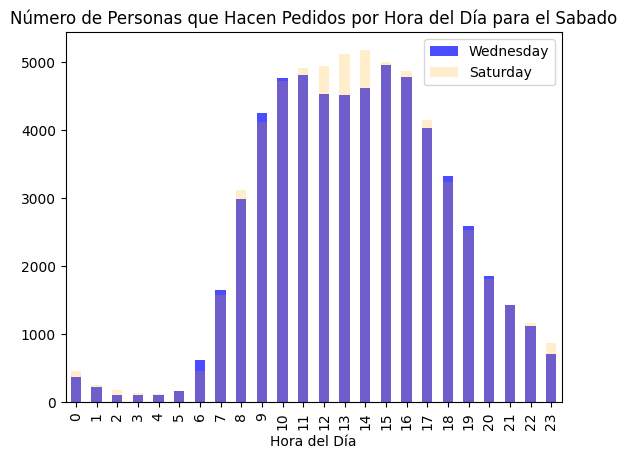

In [36]:
#¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.
wednesday_data=instacart[instacart['order_dow']==3].groupby('order_hour_of_day')['user_id'].nunique() #Filtramos por el dia miercoles y agrupamos por order_hour_of_day y contamos cuantos usuarios hay por cada hora del dia
saturday_data=instacart[instacart['order_dow']==6].groupby('order_hour_of_day')['user_id'].nunique() #Filtramos por dia sabado y agrupamos por order_hour_of_day y contamos cuantos usuarios hay por cada hora del dia
#Creamos la grafica
wednesday_data.plot(x='order_hour_of_day', y='user_id',
                   kind='bar',
                   title='Número de Personas que Hacen Pedidos por Hora del Día para el Miercoles',
                   xlabel='Hora del Día',
                  color= 'blue', alpha = 0.7)

saturday_data.plot(x='order_hour_of_day', y='user_id',
                   kind='bar',
                   title='Número de Personas que Hacen Pedidos por Hora del Día para el Sabado',
                   xlabel='Hora del Día',
                    color= 'orange', alpha = 0.2)

week_day = ['wednesday_data','saturday_data']
plt.legend(['Wednesday','Saturday'])
plt.show([week_day])

Escribe aquí tus conclusiones

Sabado tiene mas datos por ende sus barras son mas largas. Sin embargo, se evidencia que la distribución de datos es parecida. Sin embargo, las horas mas relevante para los sabados son entre la 12pm y 2pm; y para los miercoles es entre 10 am y 11 am y entre las 3pm y 4pm

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

count    478952.000000
mean         17.157563
std          17.704457
min           1.000000
25%           5.000000
50%          11.000000
75%          23.000000
max         100.000000
Name: order_number, dtype: float64


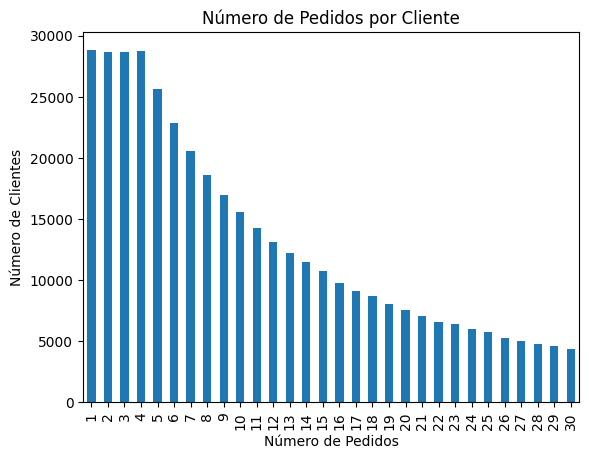

In [37]:
#2 Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...)
print(instacart['order_number'].describe())
number_orders = instacart.groupby('order_number')['user_id'].nunique() #Agrupamos por days_since_prior_order y contamos cuantos usuarios hay por cada dia pasado
#Para tener presente: segun lo que vimos con .describe(), el 75% de los datos se encuentran por debajo de 23 ordenes. El rango de la varable se encuentra entre 1 y 100, pero el pareto está hasta los 30 pedidos.
#Por fines visuales, se establece que la grafica iria hasta 30 ordenes
filtered_number_orders = number_orders[number_orders.index <= 30]
filtered_number_orders.plot(x='order_number', y='user_id',
                   kind='bar',
                   title='Número de Pedidos por Cliente',
                   xlabel='Número de Pedidos',
                   ylabel='Número de Clientes')
plt.show()


Escribe aquí tus conclusiones


Como se evidencia, la grafica tiene una distribución sesgada hacia la derecha.
La mayoria de usuarios hace de 1 a 4 pedidos y la frecuencia en pedidos va disminuyendo.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [38]:
#3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
# Encontramos los 20 productos más populares agrupando por product_id y contando el numero de usuarios por producto
popular_products = order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20)

# Convertimos el resultado a un DataFrame para poder traernos el nombre del producto de otro DataFrame
popular_products = popular_products.reset_index().rename(columns={'order_id': 'order_count'})

# Agregamos los nombres de los productos usando un merge con la tabla products
popular_products_with_names = popular_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')


print(popular_products_with_names)


    product_id  order_count              product_name
0        24852        66050                    banana
1        13176        53297    bag of organic bananas
2        21137        37039      organic strawberries
3        21903        33971      organic baby spinach
4        47209        29773      organic hass avocado
5        47766        24689           organic avocado
6        47626        21495               large lemon
7        16797        20018              strawberries
8        26209        19690                     limes
9        27845        19600        organic whole milk
10       27966        19197       organic raspberries
11       22935        15898      organic yellow onion
12       24964        15292            organic garlic
13       45007        14584          organic zucchini
14       39275        13879       organic blueberries
15       49683        13675            cucumber kirby
16       28204        12544        organic fuji apple
17        5876        12232 

Escribe aquí tus conclusiones

Frutas y verduras son los productos con mayor frecuencia de compra, liderado por los babanos principalmente


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


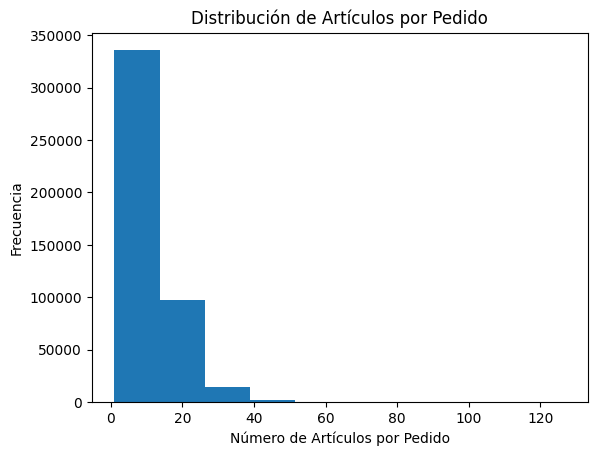

In [39]:
#Primero agrupamos las ordenes por productos para contar cuantos productos tiene cada orden
number_products_per_order = order_products.groupby('order_id')['product_id'].count()
print(number_products_per_order.describe())
#Creamos el grafico de histograma.
number_products_per_order.plot(kind='hist', title='Distribución de Artículos por Pedido',
                               xlabel='Número de Artículos por Pedido',
                               ylabel='Frecuencia')
plt.show()


Escribe aquí tus conclusiones
Mas de la mitad de los usuarios no compran mas de 10 productos por orden. Con .describe() vemos que el 75% de los datos tienen maximo 14 productos por orden y se evidencia en la grafica, a medida de crecen los productos la grafica cae fuertemente

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [40]:
#3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
#1ro filtramos productos reordenados
reordered_products = order_products[order_products['reordered'] == 1]
#2do encontramos los 20 productos reordenados más populares agrupando por product_id y contando el numero de usuarios por producto
popular_reordered_products = reordered_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20)
#3ro Convertimos el resultado a un DataFrame para poder traernos el nombre del producto de otro DataFrame
popular_reordered_products = popular_reordered_products.reset_index().rename(columns={'order_id': 'order_count'})
#4to Agregamos los nombres de los productos usando un merge con la tabla products
popular_reordered_products_with_names = popular_reordered_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(popular_reordered_products_with_names)

    product_id  order_count              product_name
0        24852        55763                    banana
1        13176        44450    bag of organic bananas
2        21137        28639      organic strawberries
3        21903        26233      organic baby spinach
4        47209        23629      organic hass avocado
5        47766        18743           organic avocado
6        27845        16251        organic whole milk
7        47626        15044               large lemon
8        27966        14748       organic raspberries
9        16797        13945              strawberries
10       26209        13327                     limes
11       22935        11145      organic yellow onion
12       24964        10411            organic garlic
13       45007        10076          organic zucchini
14       49683         9538            cucumber kirby
15       28204         8989        organic fuji apple
16        8277         8836  apple honeycrisp organic
17       39275         8799 

Escribe aquí tus conclusiones
La tabla comparada con el ejercicio anterior (B3) no cambia mucho. Cambian las cantidades pero se mantiene el top. Es decir, los productos mas pedidos por lo general son recomprados

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [41]:
# Agrupamos por product_id
product_reorder_stats = order_products.groupby('product_id').agg(
    total_orders=('reordered', 'count'),  # Total de pedidos
    times_reordered=('reordered', 'sum')  # Veces que se volvió a pedir
)

# Calculamos la proporción dividiendo las veces que se volvió a pedir un producto entre el total de pedidos
product_reorder_stats['reorder_ratio'] = product_reorder_stats['times_reordered'] / product_reorder_stats['total_orders']
print(product_reorder_stats.head())
print()
# Ordenamos por proporción de reorder para ver los productos más recurrentes
sorted_reorder_stats = product_reorder_stats.sort_values(by='reorder_ratio', ascending=False)
print(sorted_reorder_stats.head())
print()
# Agregamos los nombres de los productos usando un merge con la tabla products
popular_names = sorted_reorder_stats.merge(products[['product_id', 'product_name']], on='product_id', how='left')
print(popular_names.head)
print()
#Hacemos una prueba filtrando el ratio menos a 1 para ver los productos
print(popular_names[popular_names['reorder_ratio'] < 1])

            total_orders  times_reordered  reorder_ratio
product_id                                              
1                    280              158       0.564286
2                     11                0       0.000000
3                     42               31       0.738095
4                     49               25       0.510204
7                      2                1       0.500000

            total_orders  times_reordered  reorder_ratio
product_id                                              
14721                  1                1            1.0
20949                  3                3            1.0
6723                  10               10            1.0
6732                   3                3            1.0
45088                  1                1            1.0

<bound method NDFrame.head of        product_id  total_orders  times_reordered  reorder_ratio  \
0           14721             1                1            1.0   
1           20949             3     

Escribe aquí tus conclusiones

Se evidencia el ratio de reorder de cada producto

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [42]:
# Primero unimos las bases instacart_orders y order_products utilizando la columna 'order_id'
merged_data = instacart.merge(order_products, on='order_id', how='inner')
# Agrupamos por cliente (user_id) para calcular las estadísticas necesarias
user_reorder_stats = merged_data.groupby('user_id').agg(
    total_products=('reordered', 'count'),   # Total de productos pedidos por cliente
    reordered_products=('reordered', 'sum') # Total de productos que fueron reordenados
)

# Calculamos la proporción de productos reordenados sobre el total de productos
user_reorder_stats['reorder_ratio'] = user_reorder_stats['reordered_products'] / user_reorder_stats['total_products']

# Ordenamos por proporción de productos reordenados
sorted_user_reorder_stats = user_reorder_stats.sort_values(by='reorder_ratio', ascending=False)
print(sorted_user_reorder_stats.head())
print()
#Hacemos una prueba filtrando el ratio menos a 1 para ver los productos
print(sorted_user_reorder_stats[sorted_user_reorder_stats['reorder_ratio'] < 1])
#Filtramos usando el usuario 63173 comp prueba
print(instacart[instacart['user_id'] ==63173])
print()
#Filtramos usando el numero de orden 2839346 de usuario 63173
#Si vemos la orden, efectivamente ninguno de sus productos ha sido reordenado
print(order_products[order_products['order_id'] ==2839346])

         total_products  reordered_products  reorder_ratio
user_id                                                   
137587                3                   3            1.0
173474                2                   2            1.0
13918                 4                   4            1.0
62300                 7                   7            1.0
62307                 1                   1            1.0

         total_products  reordered_products  reorder_ratio
user_id                                                   
143831              137                 136       0.992701
196748              116                 115       0.991379
5588                107                 106       0.990654
4368                 92                  91       0.989130
113113               89                  88       0.988764
...                 ...                 ...            ...
190953                9                   0       0.000000
119371               10                   0       0.000

Escribe aquí tus conclusione

Se evidencia el ratio de reorder por usuario y por producto





```
# Tiene formato de código
```

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [43]:
# Filtramos los productos que fueron añadidos primero al carrito (add_to_cart_order == 1)
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

# Contamos cuántas veces cada producto fue el primero en el carrito
first_in_cart_counts = first_in_cart['product_id'].value_counts().head(20)

# Unimos con la tabla de productos para obtener los nombres de los productos
top_20_first_products = first_in_cart_counts.reset_index()
top_20_first_products.columns = ['product_id', 'count']
top_20_first_products = top_20_first_products.merge(products[['product_id', 'product_name']], on='product_id')

print(top_20_first_products)



    product_id  count                 product_name
0        24852  15562                       banana
1        13176  11026       bag of organic bananas
2        27845   4363           organic whole milk
3        21137   3946         organic strawberries
4        47209   3390         organic hass avocado
5        21903   3336         organic baby spinach
6        47766   3044              organic avocado
7        19660   2336                 spring water
8        16797   2308                 strawberries
9        27966   2024          organic raspberries
10       44632   1914   sparkling water grapefruit
11       49235   1797          organic half & half
12       47626   1737                  large lemon
13         196   1733                         soda
14       38689   1397     organic reduced fat milk
15       26209   1370                        limes
16       12341   1340                hass avocados
17        5785   1310  organic reduced fat 2% milk
18       27086   1309          

Escribe aquí tus conclusiones
Como hemos visto, frutas y verduras son los productos que mas compran y que mas reordenan. A su vez, tambien son los productos que ponen de primero en el carrito.
Al final tiene sentido porque evidenciamos que son los bienes de mayor necesidad para el usuario


### Conclusion general del proyecto:

Este proyecto se centró en el análisis de datos de pedidos de Instacart, abordando tres etapas clave: **descripción de los datos, preprocesamiento y análisis exploratorio**. A continuación, se resumen los logros y aprendizajes obtenidos:

1. Descripción y comprensión de los datos
Objetivo. Hallazgos:

Se detectaron valores ausentes en columnas críticas como days_since_prior_order (28,819 ausentes), product_name (1,258 ausentes) y add_to_cart_order (836 ausentes).

Variables como days_since_prior_order y add_to_cart_order presentaban tipos de datos incorrectos (float en lugar de enteros).

Las tablas mostraban relaciones lógicas (ej: order_products vinculaba pedidos con productos).

2. Preprocesamiento de datos
Objetivo. Acciones realizadas:

Corrección de tipos de datos: Columnas como days_since_prior_order y add_to_cart_order se convirtieron a enteros.

Manejo de valores ausentes:

product_name se completó con "Unknown" para registros faltantes.

days_since_prior_order se asoció con el primer pedido de usuarios, validando su lógica.

add_to_cart_order se reemplazó con 999 para indicar valores desconocidos.

Eliminación de duplicados: Se removieron 15 registros duplicados en instacart_orders

Limpieza de inconsistencias: Por ejemplo, productos duplicados en products con nombres idénticos pero IDs diferentes.

3. Análisis exploratorio de datos. Hallazgos clave:

Distribución:

Horas pico: La mayoría de los pedidos se realizan entre las 10:00 y 16:00 horas.

Días de la semana: Los días 0 (domingo) y 1 (lunes) registran mayor actividad, mientras que el miércoles (día 3) tiene menor demanda.

Frecuencia de recompra:

El 59% de los productos en order_products fueron reordenados, sugiriendo lealtad a marcas o artículos esenciales.

Tiempo entre pedidos:

El promedio fue de 11.1 días, con valores extremos (mínimo 0 días, máximo 30 días). Esto podría indicar compras recurrentes o estrategias de retención.

4. Impacto y aplicaciones prácticas
Los resultados permiten entender patrones de consumo, como horarios preferidos y productos recurrentes, útiles para optimizar:


5. Lecciones aprendidas
Calidad de datos: La identificación temprana de valores ausentes y duplicados fue crucial para evitar sesgos en el análisis.

Flexibilidad en preprocesamiento: Soluciones como asignar "Unknown" o valores temporales (999) mantuvieron la integridad del dataset sin perder información crítica.

Visualizaciones claras: Gráficos como histogramas y heatmaps facilitaron la comunicación de insights complejos.


Conclusión final
Este proyecto demostró la importancia de un procesamiento riguroso de datos y un análisis exploratorio estructurado para transformar información cruda en insights accionables. Los hallazgos no solo validan hipótesis iniciales (ej: horarios de compra), sino que también abren puertas a estrategias basadas en datos para mejorar la experiencia del usuario y la eficiencia operativa en plataformas como Instacart. El enfoque metodológico utilizado sirve como plantilla para abordar problemas similares en el ámbito del retail analítico.
